In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def fill_holes(image):
    im = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
    im_fill = im.copy()
    h, w = im.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)
    cv2.floodFill(im_fill, mask, (0, 0), 255)
    im_fill_inv = cv2.bitwise_not(im_fill)
    im_out = im | im_fill_inv
    return im_out[1:-1, 1:-1]

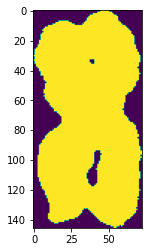

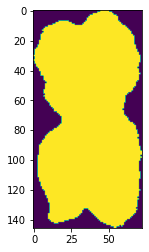

In [14]:
image = cv2.imread('/data1/huangkaibin/Data/karyotype/origin_split/sub_k/002987_msk.png', 0)
# im = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)

plt.imshow(image)
plt.show()

# im_floodfill = im.copy()
# h, w = im.shape[:2]
# mask = np.zeros((h+2, w+2), np.uint8)
# cv2.floodFill(im_floodfill, mask, (0, 0), 255)
# im_floodfill_inv = cv2.bitwise_not(im_floodfill)
# im_out = im | im_floodfill_inv

out = fill_holes(image)

plt.imshow(out)
plt.show()

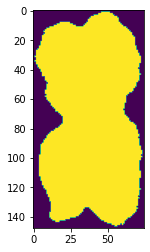

In [12]:
plt.imshow(im_out)
plt.show()

In [ ]:
import cv2;
import numpy as np;
 
# Read image
im_in = cv2.imread("nickel.jpg", cv2.IMREAD_GRAYSCALE);
 
# Threshold.
# Set values equal to or above 220 to 0.
# Set values below 220 to 255.
 
th, im_th = cv2.threshold(im_in, 220, 255, cv2.THRESH_BINARY_INV);
 
# Copy the thresholded image.
im_floodfill = im_th.copy()
 
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
 
# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
im_out = im_th | im_floodfill_inv

(146, 73)
1
8062.5


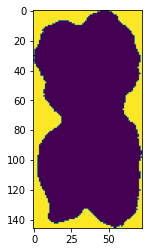

In [78]:
marker = np.zeros_like(mask)
marker[0, :] = 255
marker[-1, :] = 255
marker[:, 0] = 255
marker[:, -1] = 255

SE = cv2.getStructuringElement(shape=cv2.MORPH_CROSS, ksize=(3, 3))

while True:
    pre = marker
    dilation = cv2.dilate(marker, kernel=SE)
    marker = np.min((dilation, mask), axis=0)
#     plt.imshow(marker)
#     plt.show()
    if (pre == marker).all():
        break

dst = 255 - marker
# plt.imshow(dst)
# plt.show()
# # filling = dst - mask

# # plt.imshow(filling)
# # plt.show()

# # ret, binary = cv2.threshold(dst, 40, 255, cv2.THRESH_BINARY)

# # plt.imshow(binary)
# # plt.show()

contours,hierarch=cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

contours.sort(key=lambda x: cv2.contourArea(x))

for contour in contours:
    area = cv2.contourArea(contour)
    print(area)
    cv2.drawContours(dst, [contour], -1, 0, thickness=-1)
    
    plt.imshow(dst)
    plt.show()

In [72]:
contours[0].shape

(375, 1, 2)